# Diabetes Prediction
## Introduction
Diabetes is a chronic medical condition that occurs when the body either doesn't produce enough insulin or can't effectively use the insulin in produces. Insulin is a hormone that helps regulate blood sugar (glucose) levels, allowing the body to use glusoce for energy or store it for later use. When insulin function is impaired, glucose builds up in the blood instead of build used by cells, leading to high blood sugar levels(Punthakee et al., 2018).

There are three main types of diabetes:


**1. Type 1 Diabetes:** The body's immune system mistakenly attacks and destroys the insulin-producing cells in the pnacreas. As a result, little to no insulin is produced. People with Type 1 diabetes need to take insulin daily (Punthakee et al., 2018).

**2. Type 2 Diabetes:** The body becomes resistant to insulin, meaning it doesn't use insulin effectively, or it doesnt produce enough insulin to keep blood sugar levels normal. Lifestyle factors like poor diet, obesity, and lack of physical activity contribute to this condiction (Punthakee et al., 2018).

**3. Gestational Diabetes:** This type occurs during pregnancy when the body cannot produce enough insulin to handle the increased blood sugar levels, possibly due to hormonal changes (Punthakee et al., 2018).

Proper management includes regular monitoring of blood sugar, maintaining a healthy diet, and following medical advice regarding medications or insulin therapy (Punthakee et al., 2018).

## About the Dataset

In this project, I will explore the "Diabetes Data" imported from Kaggle. The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The patients in this dataset are female, aged 21 or older, and of Pima Indian heritage.

[Link to the dataset can be assessed here](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

Here is a breakdown of each feature in the dataset:

**1. Pregancies:** The number of times the patient has been pregnant. This variable could be an indicator of reproductive health and is often related to hormonal factors that might influence the risk of diabetes.

**2. Glucose:** The plasma glucose concentration measured two hours aftern an oral glucose tolerance test. This is a crucial test for diagnosing diabetes, as higher levels of blood glucose can indicae impaired glucose tolerance, a characteristic of diabetes.

**3. BloodPressure:** The diastolic blood pressure (measued in mm Hg). Blood pressure is often correlated with overall cardiovascular health, and high blood pressure is a risk factor for diabetes.

**4. SkinThickness:** The thickness of the skin fold measured at the triceps (in mm). This measures subcutaneous fat and can be an indirect measure of body fat, which is associated with the risk of diabetes.

**5. Insulin:** The 2-hour serum insulin level (mu U/ml). Insuin is a hormone that helps regular blood glucose levels. Abnormal insulin levels could incicate insulin resisance or issues with glucose metabolism, which are characteristic of diabetes.

**6. BMI (Body Mass Index):** This is a ratio of weight to height, calculated as weight in kg divided by height in meters squared. BMI is a measure of body fat and is strongly associated with the risk of developing diabetes.

**7. DiabetesPedigreeFunction:** This function gives an estimate of a patient's likelihood of developing diabetes based on family history. It takes into account the genetic predisposition of an individual, as diabetes can often run in families.

**8. Age:** The age of the patient in years. Older age is a known risk factor for diabetes, as the body's ability to regulate blood sugar declines over time.

**9. Outcome:** The class variable, where "0" indicates that the patient does not have diabetes and "1" indicates that the patient has diabetes - this variable in particularly important

## Research Question

Can we accurately predict diabetes in individuals using data derived the National Institute of Diabetes and Digestive and Kidney Diseases?

I will approach this research question in three steps:

1. Exploring and Refining the Dataset
2. Data Analysis and Visualization
3. Machine Learning

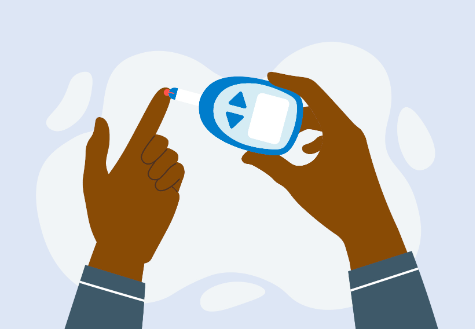


## Part 1: Exploring and Refining the Dataset

Before proceeding to work with the data, I will first import all necessary Python packages.

In [ ]:
# Import Packages

import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=12)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

At this point, I will import the data and display the first 5 rows of the dataset to get a better sense of the data.

In [ ]:
# Load data

diabetes = pd.read_csv("/content/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Dataset size

diabetes.shape

(768, 9)

As seen from the above output, there are 768 rows and 9 columns in the dataset.

In [ ]:
# Looking for any missing values

diabetes.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
print ("Duplicate values in the Diabetes dataset are:" , diabetes.duplicated().sum())

Duplicate values in the Diabetes dataset are: 0


Since the dataset doesn't have any missing or duplicate values, the next step is to check for any potential zero values in key columns where zero may not be a realistic or valid value.

Specifically, I'll be looking at the 'SkinThickness', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', and 'DiabetesPedigreeFunction' columns. These features should generally have positive, non-zero values, so I'll identify any zero values that may need further investigation or replacement with appropriate values (e.g., mean or median)."

In [ ]:
# Columns to check for zero values
columns_to_check = ['SkinThickness', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Check for zero values in the specified columns and count them
zero_counts = (diabetes[columns_to_check] == 0).sum()

# Display the count of zeros for each column
print("Count of zero values in each column:")
print(zero_counts)


Count of zero values in each column:
SkinThickness               227
Glucose                       5
BloodPressure                35
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
dtype: int64


In [ ]:
# Columns to replace zeros with mean values
columns_to_replace = ['SkinThickness', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Replacing zeros with the mean of each column
for column in columns_to_replace:
    mean_value = diabetes[column].mean()
    diabetes[column].replace(0, mean_value, inplace=True)

# Display the updated DataFrame
print("Zero values replaced with column means.")


Zero values replaced with column means.


Now, I will check what data types are present in the dataset

In [ ]:
diabetes.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


This dataset only contains integer and float data types, so there is no need to handle any string/categorical values or convert them into binary format.

This dataset is relatively small, so I will not be removing outliers as doing so will further reduce the dataset.

For clarity, I will rename the 'Outcome' column to 'Result.

In [ ]:
# Renaming the 'Outcome' column to 'Result'
diabetes = diabetes.rename(columns={'Outcome': 'Result'})

# Displaying the first few rows to confirm the change
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## Part 2: Data Analysis and Visualization

Before proceeding with model training, I will conduct a thorough analysis to gain deeper insights and observe trends within the dataset. Additionally, I will visualize the data using graphs to explore the following key questions:

1. How many positive and negative cases of diabetes are observed in the dataset?
2. How many positive cases of diabetes are observed across different age groups?
3. What features in the dataset are
4. How many individuals in the study have experienced pregnancies?



### 1. How many positive and negative cases of diabetes are observed in the dataset?

In [ ]:
# Diabetes cases count count

diabetes['Result'].value_counts()

,count
Result,
0,500
1,268


In [ ]:
import plotly.graph_objects as go

# Data for the donut chart
labels = ['Negative (No Diabetes)', 'Positive (Diabetes)']
values = [500, 268]  # Number of negative and positive cases

# Create the donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])

# Update layout for better visualization
fig.update_layout(
    title_text="Diabetes Cases Distribution",
    title_x=0.5,  # Center the title
    title_xanchor='center',
    width=600,  # Adjust width if needed
    height=400
)

# Pie chart colors
fig.update_traces(marker=dict(colors=['lightblue', 'orange']))

# Display the plot
fig.show()


As seen in the above pie chart above:

*   34.9% of the participants have diabetes.
*   65.1% of the participants do not have diabetes.

### 2. How many positive cases can be observed in each Age Group?

To get a better understanding of how many samples of data were taken for each age group, I will first plot a age distribution graph.

In [ ]:
import plotly.figure_factory as ff

# Distribution plot for the 'Age' column
hist_data = [diabetes["Age"].values]  # List of data
group_labels = ['Age']  # Label for the legend

# Distplot (interactive distribution plot with wider bins)
fig = ff.create_distplot(hist_data, group_labels, bin_size=1.5)

# Layout
fig.update_layout(
    title_text='Age Distribution plot',
    title_x=0.5,  # Centers the title
    title_xanchor='center',  # Ensures the title stays centered
    width=900,
    height=500
)

# Display the plot
fig.show()


From the Age Distribution Plot, the following observations can be made:

*   **Age Group 21-30**: This group consitutes the largest portion of participants, as evidenced by the high density of values in this age range. The majority of the data points fall here, indicating that younger adults were the most active participants in the study.
*   **Age group 3-50**: The frequency of participants gradually decreases in this range. While still represented, the number of participants in their 30s and 40s is significantly lower compared to the younger group.
*   **Age group 50+**: There are fewer participants above 50 years of age. The density sharply declines after 50, showing that the data collection in older age groups was less frequent.
*   **Rug plot**: The horizonal lines at the bottom represent individual data points. You can see that the majority of participants are clustered toward the lower end of the age spectrum, with sparse data for older individuals.

Next, I will plot a histogram to visualize how many positive and negative cases of diabetes were observed in each age group.

In [ ]:
# Separating the data into positive and negative cases based on 'Result'
negative = diabetes[diabetes["Result"] == 0]["Age"]
positive = diabetes[diabetes["Result"] == 1]["Age"]

# Data for the histogram
hist_data = [negative, positive]
group_labels = ['Negative', 'Positive']

# Create distplot with Plotly
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)

# Layout
fig.update_layout(
    title_text='Age distribution based on Positve and Negative Diabetes Cases',  # Comma added here
    title_x=0.5,  # Centers the title
    title_xanchor='center',  # Ensures the title stays centered
    width=900,
    height=500
)

# Display the plot
fig.show()

From the graph above, we can make the following observations:

*   Ages 21-45: The highest number of positive diabetes cases (orange bars) is concentrated in this age range, particularly between 30 and 45. This suggests that the prevalence of diabetes increases among individuals in their early 30s to mid-40s.
*   Data diversity: The age group with the highest number of overall samples is around age 21. However, this doesn't necessary mean that most cases are in group; instead, it is a reflection of the high sample count at this age.
*   Ages 30-45: The age range shows a noticeable concentration of positive diabetes cases. Therefore, the highest rate of diabetes seems to be observed in this age bracket range than younger participants.
*   Older Age Groups (45+): There are fewer samples overall in participants older than 45, but some positive cases are still observed, albeit at lower frequency.

In conclusion, while the data shows the highest sample collection in younger individuals (around age 21), the most prominent age group for positive diabetes cases lies between 30-45 years old.





### 3. What features in the dataset are most related to eachother?

In [ ]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Result,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


In [ ]:
features_diabetes = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]

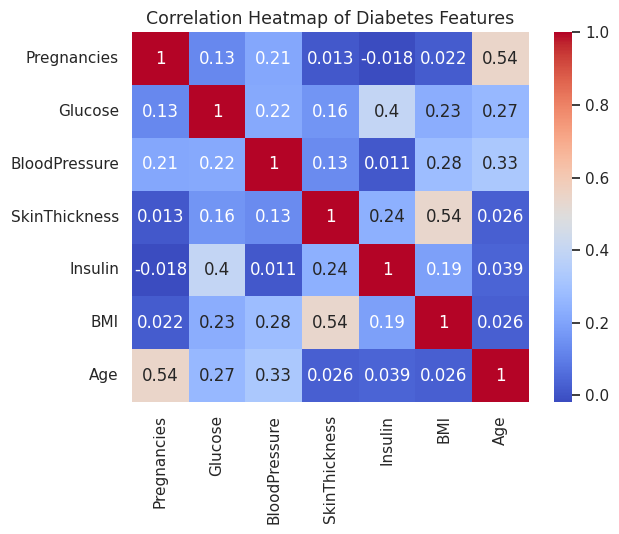

In [ ]:
# Create heatmap with annotations
sns.heatmap(features_diabetes.corr(), annot=True, fmt='.2g', cmap='coolwarm')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Diabetes Features', fontsize=12.5)

# Display the plot
plt.show()


This heatmap shows the correlation matrix between different features in the dataset.

**Analyzing the Heatmap:**

1. **Strong Positive Correlation (0.5 to 1.0)**:
  *   **Age and Pregnancies**: With a correlation of 0.54, this suggests that older individuals tend to have had more pregnancies. This relationship is intuitive as age increases the opportunity for pregancies.
  *   **BMI and SkinThickness**: The correlation of 0.54 indicates that individuals with higher BMI tend to have thicker skin folds. Both these variables are linked in body fat.

2. **Moderate Positive Correlation (0.3 to 0.5)**:
  *   **Insulin and Glucose**: A correlation value of 0.40 suggests a moderate correlation - this makes sense as insulin levels are often associated with glucose regulation in the body.  
  *   **Age and Blood Pressure**: Age and Blood Pressure also show a moderate correlation (0.33), which aligns with the common trend that pressure tends to increase with age.

3. **Weak Positive Correlation (0.1 to 0.3)**:
  *   **BMI and Blood Pressure**: There is a moderate positive correlation (0.28) between BMI and Blood Pressure, suggesting that individuals with higher BMI may also have higher blood pressure.
  *   **Glucose and Blood Pressure**: There is a moderate correlation (0.22) between Glucose and Blood Pressure, meaning that higher gluccose levels may be loosely associated with increased blood pressure.

3. **Little to no correlation**:
  *   Other correlations, such as between Insulin and Age (0.039) or Skin Thickness and Age (0.026), are weak or near zero, suggesting little to no linear relationship between these features.

**Conclusion**:
This heatmap provides a clear understanding of which features are most related to each other. The strongest relationships in the dataset are between Skin Thickness and BMI and Age and Pregancies.














### 4. How many individuals in the study have experienced pregnancies?

In [ ]:
import plotly.graph_objects as go

# Define the labels and values
labels = ['Pregnant before', 'Never Pregnant']
pregnant = diabetes[diabetes['Pregnancies'] > 0]
not_pregnant = diabetes[diabetes['Pregnancies'] == 0]
values = [len(pregnant), len(not_pregnant)]

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])

# Update layout
fig.update_layout(
    title_text="Pregnancy Status",
    title_x=0.5,  # Centered Title
    title_xanchor='center',  # Ensure title stays centered
    title_font_size=18,
    width=600,
    height=400,
    legend=dict(
        orientation="v",  # Vertical legend
        x=1, y=0.5,  # Position of the legend
        xanchor='left'
    )
)

# Pie chart colors
fig.update_traces(marker=dict(colors=['lightblue', 'orange']))

# Show the pie chart
fig.show()


As seen in the above pie chart above:

*   85.5% of the participants have experiened atleast one pregancy
*   14.5 of the participants have never experiened pregnancy.

**Implication for Diabetes Prediction:**
Since the majority of the participants have been pregnant atleast once, this imbalance could affect the performance of the diabetes prediction model. This model might disportionately learn from the patterns associated with individuals who have experiened preganancy, which could lead to biased predictions, particularly for those who have never been pregnant.



## Part 3: Machine Learning

In this section, I will develop machine learning models to predict the likehood of diabetes based on various health metrics in the 'diabetes dataset'.

The goal is to leverage these models to gain insights into the patterns within the dataset and to create a reliable predictive tool.

I will be training two different machine learning models:

1. **Logistic Regression**: A widely used classfication algorithm that estimates the probability of an instance belonging to a particular class. It is particurlarly useful in binary classification problems, such as predicting whether a person has diabetes or not.

2. **Support Vector Classfier (SVC)**: SVC is a classification technique that tries to find the best boundary (or hyperplane) between classes. SVC is useful for maximizing the margin between different classes, which can result in improved accuracy.

Throughout this process, I will evaluate the models using various metrics, such as accuracy and confusion matrics, to access their performance and determine which model provides the best predictions for diabetes.


### Logistic Regression

In [ ]:
# Selecting Features and Target Values

X = diabetes.drop('Result',axis=1) # Features
y = diabetes['Result'] # Target Value

# all columns except 'Outcome' are kept in X. X contains the input features for model training (independent variables).
# y contains the output (dependent variable) or the target values, which is the 'Outcome' column.

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [ ]:
y

,Result
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Split X and y into training and testing sets

# Training = 80, Testing = 20

X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 , random_state = 40)

The dataset is now split into two parts: training data and testing data using the train_test_split function from sklearn.model_selection. The training data is used to teach the model, and the testing data is used to evaluate how well the model performs.

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_test.shape

(154,)

In [ ]:
model_lg = LogisticRegression()

model_lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model_lg.predict(X_test) # Predicted class labels from test features
list(y_pred)[:5]

[1, 0, 1, 0, 0]

In [ ]:
# Finding Accuracy for training data
X_train_prediction = model_lg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7703583061889251


In [ ]:
# Finding Accuracy for testing data
X_test_prediction = model_lg.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.7402597402597403


The accuracy of the model is calualated using accuracy_score for both the training and the testing datasets. This gives a sense of how well the model is performing on both sets.

Accuracy of 0.77 on the training data and accuracy of 0.74 on the testing data are pretty good considering the smaller size of the data.

An accuracy on 0.77 on the training data means the model is good at predicting overall.

In [ ]:
model_lg.coef_

array([[ 1.35055328e-01,  3.51839796e-02, -1.28756397e-02,
         1.75789081e-03, -2.19877662e-03,  4.34940523e-02,
         2.17200729e+00, -4.08967691e-03]])

After training the model, I will now create a confusion matrix. A confusion matrix is a table that shows the number of correct and incorrect predictions made by the model. It helps understand where the model is making mistakes, such as predicting someone doesn't have diabetes when they actually do. In this scenario, the task is predicting whether someone has diabetes (1) or not (0).

The confusion matrix is visualizaed using matplotlib to make it easy to see how well the model is doing in terms of classification.

In [ ]:
confusion_matrix (y , model_lg.predict (X))

array([[444,  56],
       [125, 143]])

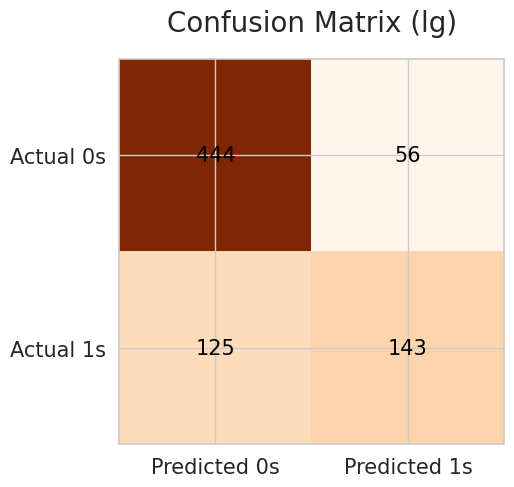

In [ ]:
cm = confusion_matrix(y, model_lg.predict(X))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5,5))

# Color scheme
ax.imshow(cm, cmap='Oranges')

# Set x and y axis labels
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Set centred title
ax.set_title("Confusion Matrix (lg)", fontsize=20, pad=20, loc='center')

# Tick parameters for font size
ax.tick_params(axis='both', which='major', labelsize=15)

# Adjusted imits for the y-axis to prevent a visual cutoff
ax.set_ylim(1.5, -0.5)

# Annotated cells with count
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=15)

# Show the plot
plt.show()


Confusion Matrix Breakdown:

*   **Predicted 0s / Predicted 1s:** The predictions made by the model.
*   **Actual 0s / Actual 1s:** The true (real) values from the dataset.

What these numbers mean:


*   **Top-left (444):** These are the True Negatives (TN). The model correctly predicted 444 people do not have diabetes (predicted 0, actual 0).

* **Top-right (56):** These are the False Positives (FP). The model incorrectly predicted that 56 people have diabetes when they actually do not (predicted 1, actual 0). This is also known as a "Type I error."

*   **Bottom-left (125):** These are the False Negatives (FN). The model incorrectly predicted that 125 people do not have diabetes when they actually do (predicted 0, actual 1). This is also called a "Type II error."


*   **Bottom-right (143):** These are the True Positives (TP). The model correctly predicted that 143 people have diabetes (predicted 1, actual 1).

### Support Vector Classifier (SVC)

In [ ]:
model_svm = svm.SVC(kernel = 'linear')

In [ ]:
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Finding Accuracy for training data
X_train_prediction = model_svm.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7785016286644951


In [ ]:
# Finding Accuracy for testing data
X_test_prediction = model_svm.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy on testing data : ', testing_data_accuracy)

Accuracy on testing data :  0.7792207792207793


Using svc, we have accuracy of 0.78 on both the training and the testing data.

An accuracy on 0.78 on the training data means the model is good at predicting overall.

In [ ]:
model_svm.coef_

array([[ 1.31367420e-01,  2.90012133e-02, -6.67705792e-03,
        -5.61084066e-03, -4.78735802e-04,  7.09306164e-02,
         8.53305194e-01, -4.09643900e-03]])

In [ ]:
confusion_matrix (y , model_svm.predict (X))

array([[450,  50],
       [120, 148]])

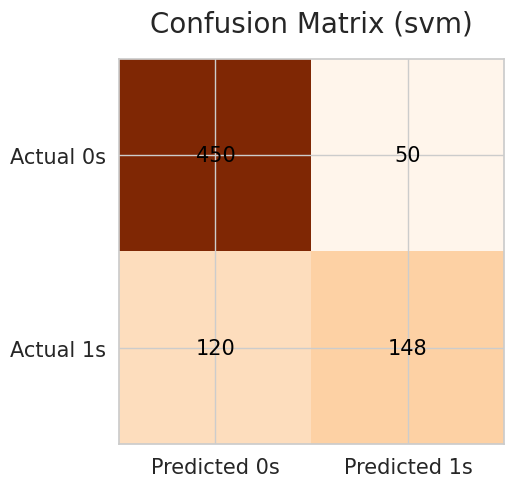

In [ ]:
cm = confusion_matrix(y, model_svm.predict(X))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5,5))

# Color scheme
ax.imshow(cm, cmap='Oranges')

# Set x and y axis labels
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Set centred title
ax.set_title("Confusion Matrix (svm)", fontsize=20, pad=20, loc='center')

# Tick parameters for font size
ax.tick_params(axis='both', which='major', labelsize=15)

# Adjusted imits for the y-axis to prevent a visual cutoff
ax.set_ylim(1.5, -0.5)

# Annotated cells with count
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=15)

# Show the plot
plt.show()


Confusion Matrix Breakdown:

*   **Predicted 0s / Predicted 1s:** The predictions made by the model.
*   **Actual 0s / Actual 1s:** The true (real) values from the dataset.

What these numbers mean:

*   **450 (Top-left):** These are the True Negatives (TN), meaning the model correctly predicted that 450 people do not have diabetes (predicted 0, actual 0).
*   **50 (Top-right):** These are the False Positives (FP), meaning the model incorrectly predicted that 50 people have diabetes when they actually do not (predicted 1, actual 0). This is also known as a "Type I error."
*   **120 (Bottom-left)**: These are the False Negatives (FN), meaning the model incorrectly predicted that 120 people do not have diabetes when they actually do (predicted 0, actual 1). This is also called a "Type II error."
*   **148 (Bottom-right)**: These are the True Positives (TP), meaning the model correctly predicted that 148 people have diabetes (predicted 1, actual 1).



## Conclusion

In this project, I explored predictive modeling for diabetes using logistic regression and support vector machine (SVC) algorithms. Both models demonstrated reasonable accuracy, with logistic regression achieving 0.77 on the training set and 0.74 on the test set, and SVC achieving an accuracy of 0.78 for both. While these results are promising, the confusion matrics highlight significant occurrences of Type I and Type II errors.

Particularly, the high rate of rate of false negatives in both models is concerning given the serious health risks associated with undiagnosed diabetes. These errors may stem from the dataset's limitations, such as its size and imbalance, particularly in age and pregnancy history distributions.

The analysis and model training conducted offer valuable insights into factors influencing diabetes. The heatmap analysis provided a clear visualization of the relationship between features, confirming known medical insights such as the link between age and blood pressure and the correlation between BMI and skin thickness. However, the predictive performance of the models indicates that there is significant room for improvement, especially in reducing misclassifications that could have critical implictions for patient care. The study's findings underscore the complexity of diabetes prediction and the necessity for advanced analytical strategies to improve accuracy.

### Steps for Improvement

1. Increase Dataset Size and Diversity: One of the main limitations identified is the dataset size and its representation. Explanding the dataset to include more samples across various demographics could help improve the model's learning and generalization capabilities. This expansion should focus not only on increasing numbers but also on including a broader spectrum of ages, more diverse health histories, and a variety of ethnic background to enhance model robustness.

2. Advanced Modeling Techniques: Exploring more complex algorithms like ensemble methods, deep learning or advanced boosting techniques might capture nonlinearities and complex interactions between the features better.

3. Improved Evaluation Metrics: The use of additional metrics such as F1-score, precision-recall curves, and AUC-ROC may provide a deeper understanding of model performance beyonf simple accuracy, especially in the context of an imbalanced dataset.

4. Regular Updating of Models: As new data becomes available, regularly updating the model to learn from the latest information can help in maintaining the relevance and accuracy of the predictions.

These steps will not only enhance the predictive accuracy but also ensure that the models remain applicable and effective in real-world settings, ultimately aiding in better diabetes management and patient care.





## References

Akturk, M. (2020, August 5). Diabetes dataset. Kaggle. https://www.kaggle.com/datasets/mathchi/diabetes-data-set

Punthakee, Z., Goldenberg, R., & Katz, P. (2018). Definition, classification and diagnosis of diabetes, Prediabetes and metabolic syndrome. Canadian Journal of Diabetes, 42. https://doi.org/10.1016/j.jcjd.2017.10.003